# Data Analysis on bank loans from Prosper
## by Aaron Remski

> This dataset contains ~114,000 records containing data on bank loans. It includes 81 variables ranging from CreditGrade to StatedMonthlyIncome.

In [209]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

In [210]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [211]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

## Dataset Overview


In [212]:
# width & height
loanDF.shape

(113937, 81)

In [213]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [214]:
# see sample of data
loanDF.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
6009,08653603933830815468057,1245953,2014-03-08 06:40:30.870000000,NaN,60,Current,NaN,0.1807,0.1570,0.1470,0.1379,0.0649,0.0730,4.0000,C,7.0000,1,NJ,Accountant/CPA,Employed,53.0000,True,False,NaN,2014-03-08 06:40:33,680.0000,699.0000,2005-12-12 00:00:00,27.0000,26.0000,41.0000,12,551.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25120.0000,0.6100,16060.0000,29.0000,1.0000,1.0000,0.3600,"$50,000-74,999",True,5500.0000,499D3708983147277BF248B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135602,15000,2014-03-11 00:00:00,Q1 2014,325D370833217442017616A,362.3800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
31720,48A63419648660013282A4D,319160,2008-04-27 11:22:05.257000000,HR,36,Chargedoff,2010-03-09 00:00:00,0.3370,0.3130,0.3030,NaN,NaN,NaN,NaN,NaN,NaN,4,MA,Skilled Labor,Full-time,20.0000,True,False,NaN,2008-04-14 09:49:05.963000000,540.0000,559.0000,2004-09-11 00:00:00,11.0000,6.0000,24.0000,3,102.0000,8.0000,37.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3579.0000,0.9800,75.0000,21.0000,1.0000,1.0000,0.2800,"$25,000-49,999",True,2083.3333,614F3420070710964685398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584,23.0000,70,30656,1000,2008-05-07 00:00:00,Q2 2008,BEBF3412280900223619630,43.1700,673.8900,279.3600,394.5300,-12.6000,0.0000,720.6400,720.6400,0.0000,1.0000,0,0,0.0000,20
12907,F9B93583606352630A1431C,846351,2013-07-21 20:23:23.877000000,NaN,60,Current,NaN,0.2228,0.1984,0.1884,0.1765,0.0674,0.1091,4.0000,C,7.0000,1,NY,Professional,Employed,48.0000,False,False,NaN,2013-07-21 20:25:32,680.0000,699.0000,2005-09-29 00:00:00,11.0000,11.0000,20.0000,6,352.0000,1.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15231.0000,0.7200,5769.0000,15.0000,1.0000,0.0000,0.2100,"$75,000-99,999",True,7250.0000,F0103689122116370B985EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,8,96390,25000,2013-07-25 00:00:00,Q3 2013,0AF03585226536531CC80DE,660.1200,4620.8400,1786.6900,2834.1500,-142.8400,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,154
71938,7B6A3464043187316412EA7,427281,2009-10-07 15:13:23.950000000,NaN,36,Completed,2011-02-22 00:00:00,0.1402,0.1045,0.0945,0.0732,0.0210,0.0732,6.0000,A,9.0000,1,ID,Clerical,Full-time,48.0000,True,False,NaN,2009-10-05 18:56:37,740.0000,759.0000,1991-11-26 00:00:00,20.0000,18.0000,44.0000,18,1460.0000,4.0000,11.0000,0.0000,0.0000,0.0000,0.0000,0.0000,68566.0000,0.6800,31134.0000,41.0000,1.0000,1.0000,NaN,"$50,000-74,999",Fal

## Structure of Dataset summarized
* ~114k records with 81 characteritics on bank loans <br>
* Of the ~114K records, there are a numerous that represent a small portion of the dataset. TotalProsperLoans, TotalProsperPaymentsBilled, & OnTimeProsperPayments to name a few <br>
* Out of 114k records, there are only ~29k records that contain data for CreditGrade and ~85k with "ProsperRating (Alpha)" values <br>

## Assessing Dataset

* Roughly 20 columns can be removed to make it easier to manage the data <br>
* Several columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), 'IncomeRange to ordered categorical type<br>
* Two columns express dates, CloseDate & DateCreditPulled. Convert to datetime type


In [215]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [216]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

In [217]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

In [218]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [219]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [220]:
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

In [221]:
'ListingCreationDate','ClosedDate','DateCreditPulled'

('ListingCreationDate', 'ClosedDate', 'DateCreditPulled')

In [222]:
# Review IncomeRange for all loans
loanDF['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
0                     0
Name: IncomeRange, dtype: int64

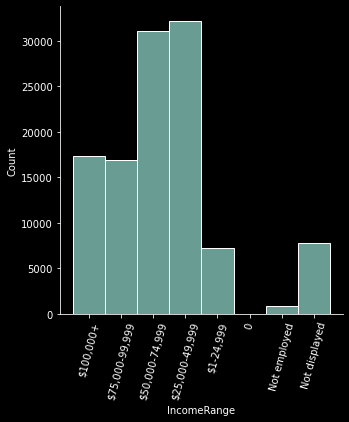

In [223]:
sb.displot(data=loanDF, x='IncomeRange')
plt.xticks(rotation=75);

## Histogram Analysis
* Roughly the same number of loans represented for IncomeRange 100k+ and 75k-100k, 17k records
* Roughly the same number of loans represented for IncomeRange 50k-75k and 25k-50k, 32k records
* Additional visuals will be using IncomeRange below


In [224]:
loanDF['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

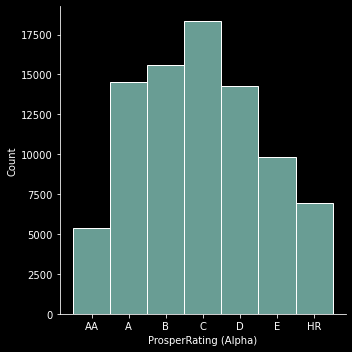

In [225]:
sb.displot(data=loanDF, x='ProsperRating (Alpha)');

## Histogram Analysis

* follows a normal distribution curve where 'C' represents the median (roughly)

In [226]:
# reveal number of records according to their LoanStatus
loanDF.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

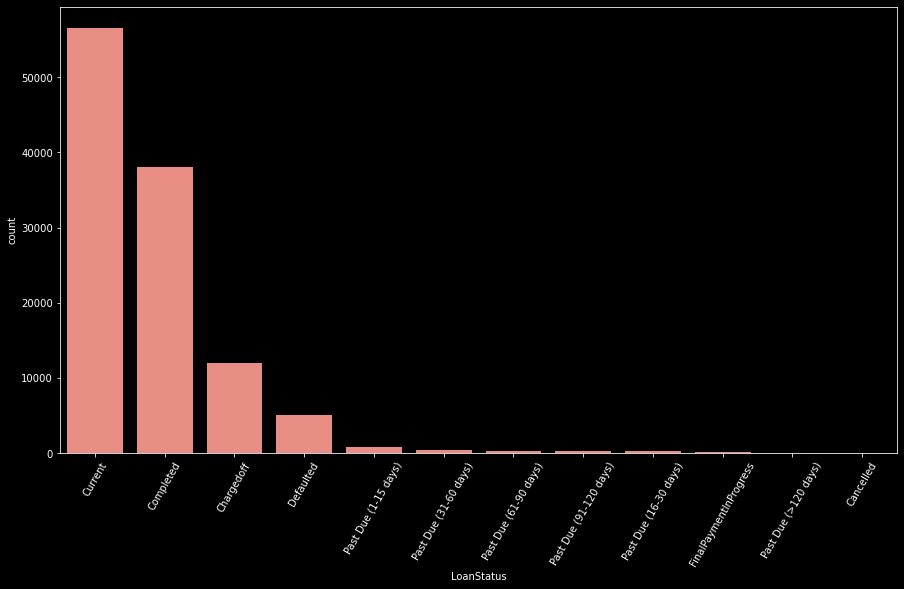

In [227]:
# Visualize LoanStatus distribution

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF, x='LoanStatus', color=sb.color_palette()[3], order=loanDF.LoanStatus.value_counts().index);

## Countplot analysis
> As expected the majority of the bank loans are either current(good standing) or completed. However there is a healthy no. of ChargedOffs & Defaulted loans.<br/>
> I would like further analysis of ChargedOff & Defaulted 

In [228]:
loanDF3 = loanDF.copy()

In [229]:
# THIS IS NOT WORKING AS INTENTED
#loanDF3.drop(loanDF3.query('LoanStatus == "Completed" and LoanStatus == "Current"').index, inplace=True)
#loanDF3.sample(15)

In [230]:
''' Columns with small amount of data
EstimatedEffectiveYield
EstimatedLoss          
EstimatedReturn        
ProsperRating (numeric)
ProsperRating (Alpha)  
ProsperScore           
'''

' Columns with small amount of data\nEstimatedEffectiveYield\nEstimatedLoss          \nEstimatedReturn        \nProsperRating (numeric)\nProsperRating (Alpha)  \nProsperScore           \n'

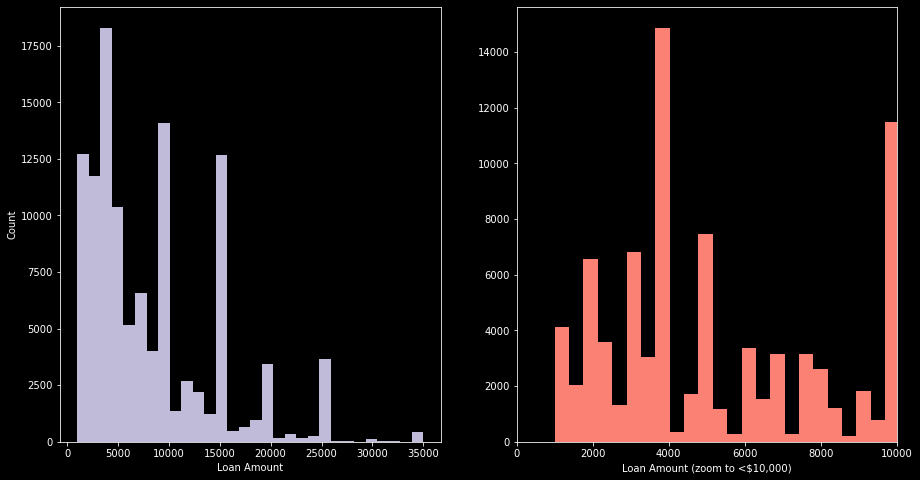

In [231]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


### Histogram analysis
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* There is a right-skew.<br>
* Nearly half of all Prosper loans are < $5000. What distingquishes these loans from the others?
* Investigate the `$`4000 loans<br>


In [232]:
loanDF3.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

count   51824.0000
mean     3270.4115
std      1191.0671
min      1000.0000
25%      2250.0000
50%      3500.0000
75%      4000.0000
max      5000.0000
Name: LoanOriginalAmount, dtype: float64

In [233]:
# loans5000.CreditGrade.value_counts()
loanDF3.query("LoanOriginalAmount <= 5000")['CreditGrade'].value_counts()

D     3623
HR    3326
C     3184
E     2869
B     1803
AA    1577
A     1304
Name: CreditGrade, dtype: int64

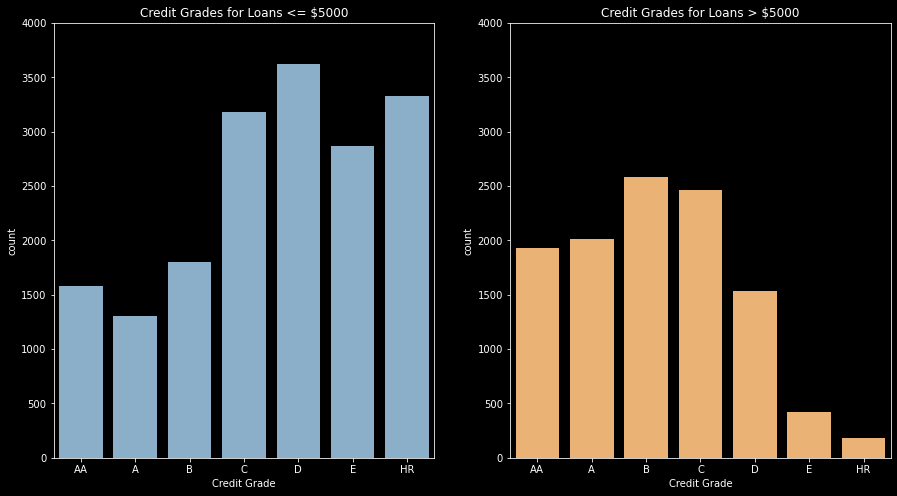

In [234]:
#sb.displot(data=loans5000, x='CreditGrade')
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

#plt.xlabel('CreditGrade for Loans <= $5000')
graph2 = sb.countplot(data=(loanDF3.query("LoanOriginalAmount <= 5000")), x='CreditGrade', color=sb.color_palette()[4])
graph2.set(title="Credit Grades for Loans <= $5000")
plt.xlabel("Credit Grade")
plt.ylim(0,4000)

plt.subplot(1,2,2)
#plt.xtitle('CreditGrade for Loans <= $5000')
graph = sb.countplot(data=(loanDF3.query("LoanOriginalAmount > 5000")), x='CreditGrade',  color=sb.color_palette()[5]);
graph.set(title="Credit Grades for Loans > $5000")
plt.xlabel("Credit Grade")
#sb.displot(data=loans5000, x='CreditGrade');
plt.ylim(0,4000);


## Bivariate Analysis
### What is the CreditGrade distribution for loans less than 5000 and for loans great than 5000
* 45% of the loans are <= $5000 where the borrowers CreditGrade is predominately C or below!
* The creditgrades for loans <= 5000 are considerably lower than those that are > 5000<br>

In [235]:
loanDF3.LoanOriginalAmount.sum()

949894347

$950,000,000 in loans TOTAL

In [236]:
Completed = loanDF.loc[loanDF['LoanStatus'] == 'Completed']
Current =  loanDF.loc[loanDF['LoanStatus'] == 'Current']
completed_current = Completed.append(Current)
completed_current.sample(5)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
41739,1102326,2013-12-22 06:05:35.697000000,NaN,60,Current,NaN,0.1820,0.1585,0.1485,0.1395,0.0624,0.0771,4.0000,C,4.0000,1,CO,Other,Employed,35.0000,False,False,NaN,2013-12-22 06:05:37,700.0000,719.0000,2005-05-27 00:00:00,8.0000,8.0000,11.0000,7,158.0000,1.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000,3013.0000,0.4300,3669.0000,0.0000,0.2500,"$25,000-49,999",True,3500.0000,NaN,10000,2014-01-02 00:00:00,Q1 2014,242.3800,484.7600,229.8600,254.9000,-16.0800,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
7768,184408,2007-08-09 09:29:17.980000000,D,36,Completed,2008-09-03 00:00:00,0.2224,0.2150,0.2050,NaN,NaN,NaN,NaN,NaN,NaN,0,OH,Other,Full-time,2.0000,True,False,NaN,2007-07-22 14:36:47.723000000,620.0000,639.0000,2000-08-29 00:00:00,5.0000,6.0000,10.0000,4,40.0000,4.0000,8.0000,1.0000,2347.0000,0.0000,0.0000,0.0000,510.0000,0.1700,871.0000,2.0000,0.1700,"$25,000-49,999",True,3208.3333,NaN,3000,2007-08-21 00:00:00,Q3 2007,113.8000,3338.2400,3000.0000,338.2400,-15.7300,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,30
94776,786254,2013-05-22 16:39:17.683000000,NaN,36,Current,NaN,0.2271,0.1899,0.1799,0.1679,0.0724,0.0955,4.0000,C,6.0000,11,LA,Food Service Management,Employed,19.0000,False,False,NaN,2013-05-22 18:03:05,680.0000,699.0000,2005-01-13 00:00:00,5.0000,5.0000,9.0000,4,89.0000,0.0000,1.0000,0.0000,0.0000,26.0000,0.0000,0.0000,1867.0000,0.5600,1078.0000,0.0000,0.1300,"$25,000-49,999",True,3750.0000,NaN,10000,2013-05-28 00:00:00,Q2 2013,366.5100,3298.5900,1986.2400,1312.3500,-69.1000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,9
49333,1028709,2013-11-08 11:31:12.707000000,NaN,36,Current,NaN,0.1583,0.1299,0.1199,0.1148,0.0399,0.0749,6.0000,A,6.0000,7,CA,Medical Technician,Employed,182.0000,False,False,NaN,2013-11-08 11:31:12,680.0000,699.0000,1999-11-20 00:00:00,7.0000,4.0000,22.0000,2,65.0000,3.0000,8.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,9800.0000,1.0000,0.2900,"$50,000-74,999",True,5416.6667,NaN,20000,2013-11-13 00:00:00,Q4 2013,673.7800,2014.2222,1381.7200,632.5022,-49.2500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
39672,764695,2013-05-01 10:31:35.087000000,NaN,36,Current,NaN,0.3254,0.2859,0.2759,0.2512,0.1375,0.1137,2.0000,E,3.0000,13,KY,Teacher,Employed,321.0000,True,False,NaN,2013-05-01 10:31:30,600.0000,619.0000,1983-07-01 00:00:00,5.0000,6.0000,45.0000,5,166.0000,1.0000,7.0000,1.0000,2756.0000,0.0000,1.0000,0.0000,5482.0000,0.0000,0.0000,0.0000,0.2000,"$50,000-74,999",True,4666.6667,9.0000,2000,2013-05-06 00:00:00,Q2 2013,83.3700,750.3300,350.3400,399.9900,-14.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,35


In [237]:
# Total the Loan Original Amount for all Completed & Current loans 
completed_current['LoanOriginalAmount'].sum()

821818138

#### $820,000,000 total loans that are Current or Completed

In [238]:
# Get all bad loans into new DF
Defaulted = loanDF.loc[loanDF['LoanStatus'] == 'Defaulted']
Chargedoff =  loanDF.loc[loanDF['LoanStatus'] == 'Chargedoff']
defaulted_chargedoff = Defaulted.append(Chargedoff)
defaulted_chargedoff.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
110252,627757,2012-08-21 18:34:36.030000000,NaN,60,Chargedoff,2013-05-30 00:00:00,0.2689,0.2433,0.2333,0.2278,0.0799,0.1479,4.0000,C,8.0000,13,CA,Social Worker,Employed,55.0000,False,False,NaN,2012-08-21 18:34:30,640.0000,659.0000,1986-04-02 00:00:00,6.0000,5.0000,25.0000,4,90.0000,0.0000,4.0000,2.0000,28681.0000,6.0000,1.0000,0.0000,3021.0000,0.5900,1350.0000,1.0000,0.1800,"$25,000-49,999",True,3583.3333,NaN,3000,2012-08-28 00:00:00,Q3 2012,86.8800,347.5200,106.7000,240.8200,-9.9000,0.0000,2893.3000,2893.3000,0.0000,1.0000,0,0,0.0000,18
61398,380385,2008-08-09 20:33:32.283000000,C,36,Chargedoff,2009-11-20 00:00:00,0.1818,0.1600,0.1500,NaN,NaN,NaN,NaN,NaN,NaN,7,CA,Other,Full-time,48.0000,False,False,NaN,2008-07-30 17:06:52.167000000,660.0000,679.0000,1972-08-01 00:00:00,1.0000,1.0000,3.0000,0,0.0000,1.0000,5.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,"$25,000-49,999",True,4000.0000,NaN,4000,2008-08-19 00:00:00,Q3 2008,140.6300,1406.3000,927.3300,478.9700,-29.9400,-360.0000,3072.6700,2712.5100,839.8400,1.0000,0,0,0.0000,127
75662,314106,2008-04-19 11:12:52.957000000,D,36,Chargedoff,2010-09-28 00:00:00,0.1768,0.1550,0.1450,NaN,NaN,NaN,NaN,NaN,NaN,6,MI,Food Service,Part-time,7.0000,False,False,NaN,2008-03-27 21:13:56.200000000,600.0000,619.0000,2005-09-29 00:00:00,3.0000,3.0000,8.0000,3,165.0000,1.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5511.0000,0.5900,1999.0000,1.0000,0.3800,"$1-24,999",True,1401.0000,NaN,4000,2008-04-29 00:00:00,Q2 2008,139.6400,3046.7200,2023.9300,1022.7900,-59.2100,0.0000,1862.4700,1976.0700,0.0000,1.0000,0,0,0.0000,135


In [239]:
defaulted_chargedoff.LoanOriginalAmount.sum()

109286564

#### $110,000,000 in bad loans. 

In [240]:
(110000000 / 950000000) * 100

11.578947368421053

## 11.6% of the bank loans represented in this dataset are defaulted or chargedoff.

Text(0.5, 1.0, 'Defaulted Loan count vs. Chargedoff Loans')

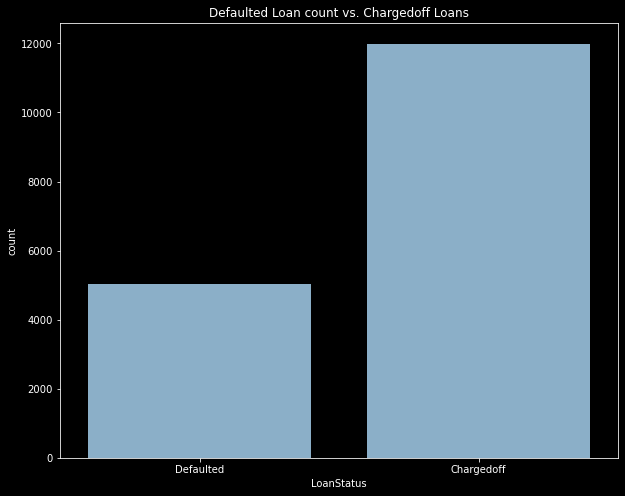

In [241]:
# Quick look at the distribution between 'defaulted' & 'Chargedoff' loans in new DF
ax = plt.figure(figsize=[10,8])
#ax.set_title('Defaulted vs. Chargedoff Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
#ax.set_title('BLABLABLA')
graph = sb.countplot(data=defaulted_chargedoff, x='LoanStatus', color=sb.color_palette()[4])
graph.set_title("Defaulted Loan count vs. Chargedoff Loans")

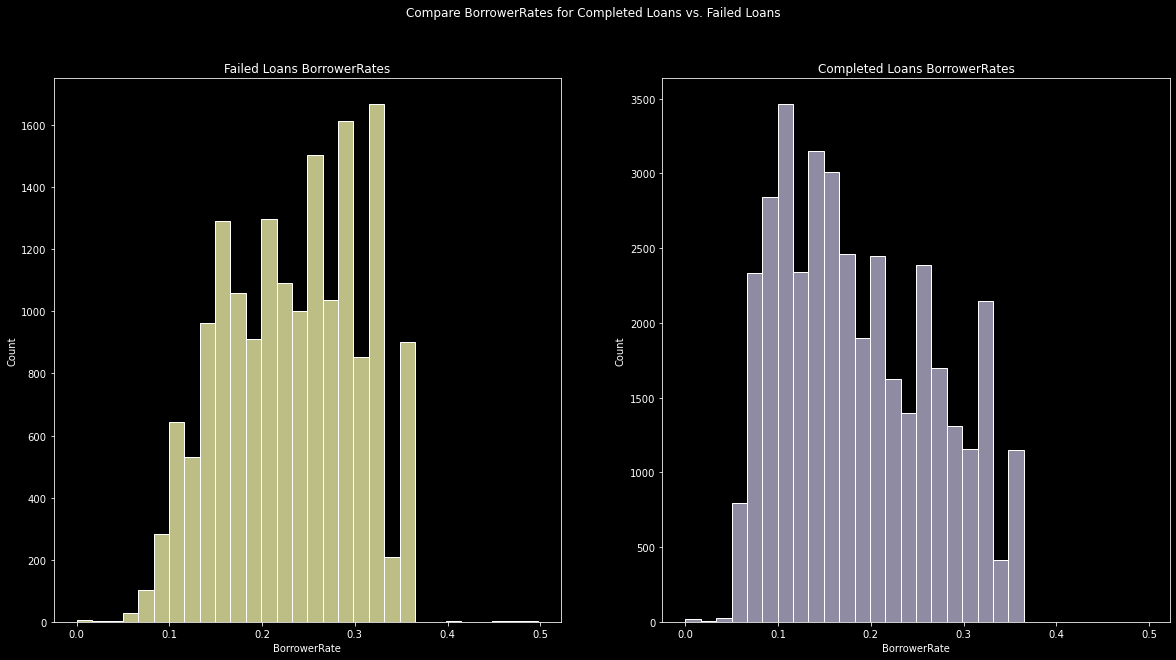

In [242]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Compare BorrowerRates for Completed Loans vs. Failed Loans")

# Top LEFT HISTOGRAM
# 1 row, 2 cols, subplot 1
#plt.subplot(2, 2, 1)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
ax[0].set_title("Failed Loans BorrowerRates")
sb.histplot(data=defaulted_chargedoff, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[0]);


# Top RIGHT HISTOGRAM
# 1 row, 2 cols, subplot 2
#plt.subplot(2,2,2)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
ax[1].set_title("Completed Loans BorrowerRates")
sb.histplot(data=Completed, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[1]);



In [243]:
print(f"Completed Loans mean interest rate: {Completed.BorrowerRate.mean()}")
print(f"Failed Loans mean interest rate: {defaulted_chargedoff.BorrowerRate.mean()}")

Completed Loans mean interest rate: 0.18642228423595686
Failed Loans mean interest rate: 0.2317624103468487


## Bivariate Analysis

One can see that the 'Failed Loans' have higher BorrowerRates than loans that are completed.


In [244]:
# get all records that match the query
past3160 = loanDF.query("LoanStatus == 'Past Due (31-60 days)'")
past6190 = loanDF.query("LoanStatus == 'Past Due (61-90 days)'")
past91120 = loanDF.loc[loanDF.LoanStatus == 'Past Due (91-120 days)']
past120 = loanDF.query("LoanStatus == 'Past Due (>120 days)'")

defaulted = loanDF.query("LoanStatus == 'Defaulted'")

all_past = past3160.append([past6190, past91120, past120])


In [253]:
all_past.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
22376,738819,2013-03-27 09:01:22.117000000,NaN,36,Past Due (91-120 days),NaN,0.3179,0.2786,0.2686,0.2447,0.1325,0.1122,2.0000,E,3.0000,8,NJ,Professional,Employed,11.0000,False,False,NaN,2013-03-27 09:01:17,600.0000,619.0000,1997-03-24 00:00:00,8.0000,8.0000,43.0000,4,104.0000,2.0000,10.0000,0.0000,0.0000,15.0000,1.0000,0.0000,2535.0000,0.6600,1265.0000,1.0000,0.2600,"$50,000-74,999",True,4583.3333,9.0000,4000,2013-03-29 00:00:00,Q1 2013,165.1500,1165.9000,451.7300,714.1700,-19.2500,-32.3000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,47
21440,622299,2012-08-09 15:26:03.707000000,NaN,36,Past Due (61-90 days),NaN,0.1583,0.1299,0.1199,0.1195,0.0399,0.0796,6.0000,A,6.0000,3,FL,Other,Not employed,4.0000,True,False,NaN,2012-08-09 15:26:01,720.0000,739.0000,1994-03-29 00:00:00,9.0000,9.0000,19.0000,8,282.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8397.0000,0.3700,13887.0000,1.0000,NaN,Not employed,False,0.0000,31.0000,5000,2012-08-14 00:00:00,Q3 2012,168.4500,2526.7500,1850.0900,676.6600,-52.1000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,88
95571,596616,2012-06-05 17:57:29.473000000,NaN,60,Past Due (61-90 days),NaN,0.2332,0.2085,0.1985,0.1950,0.0565,0.1385,5.0000,B,8.0000,1,NY,Skilled Labor,Employed,120.0000,True,False,NaN,2012-06-05 17:57:24,740.0000,759.0000,1993-05-17 00:00:00,5.0000,5.0000,16.0000,3,290.0000,1.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5334.0000,0.3300,10566.0000,0.0000,0.2000,"$25,000-49,999",True,2250.0000,NaN,6000,2012-06-27 00:00:00,Q2 2012,161.8100,2750.7700,1124.0600,1626.7100,-78.0300,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,91


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

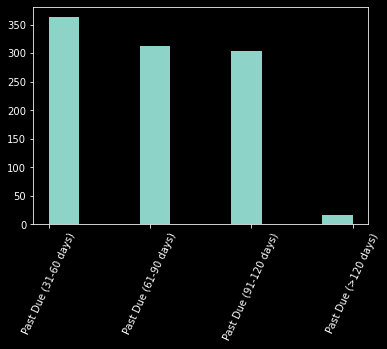

In [246]:
# plot distribution of LoanStatus where loanstatus == past due

plt.hist(data=all_past, x='LoanStatus')
plt.xticks(rotation=65)

There are no "CreditGrade" values for all entries with "past due" in LoanStatus

In [247]:
all_past.LoanOriginalAmount.sum()

8083169

#### $8,000,000 in Past Due loans

In [248]:
loanDF.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
Name: CreditGrade, dtype: int64

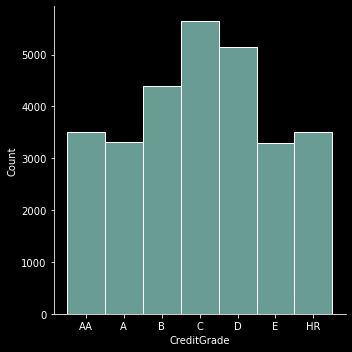

In [249]:
sb.displot(data=loanDF, x="CreditGrade")

## Histogram Analysis

* Plotting a histogram of the CreditGrades indicates a normal distribution of CreditGrades across the spectrum of grades. 
* Unfortunately the data is incomplete for "past due" loans. The "past due" loans do not have CreditGrade data.

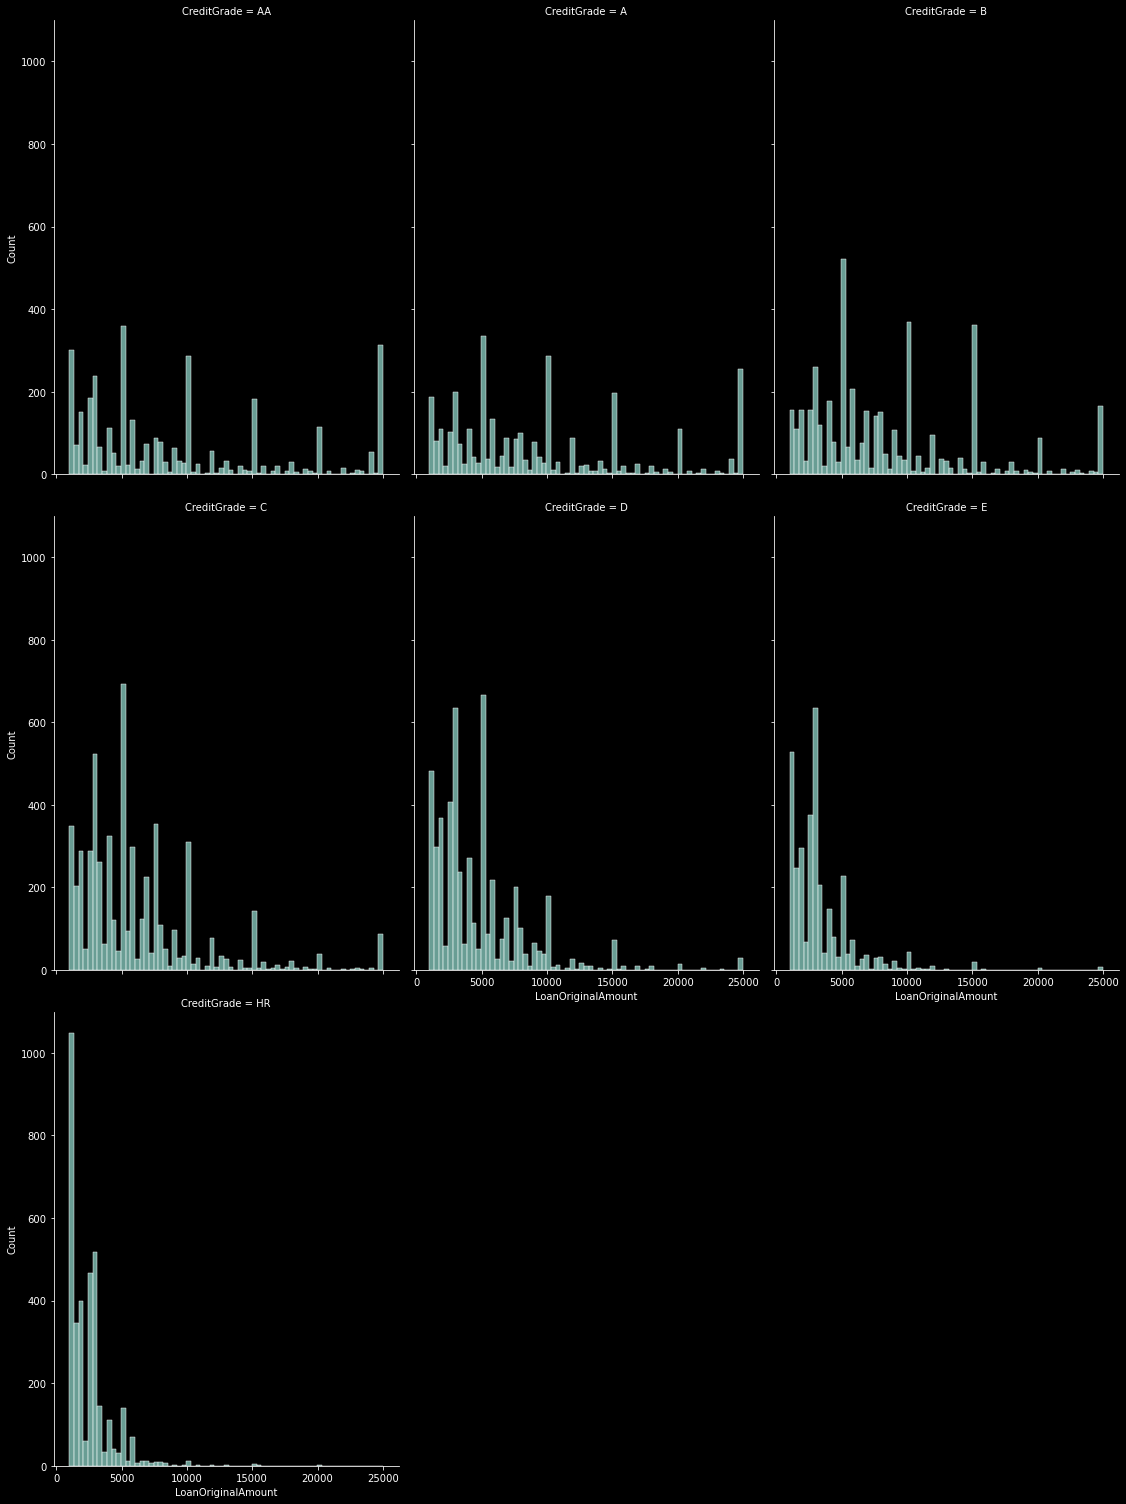

In [250]:
sb.displot(data=loanDF, x='LoanOriginalAmount', col="CreditGrade", height=7, aspect=.75, col_wrap=3)

#axes = axes.flatten()
#print(axes)

## Faceted Histogram Analysis

* 

# Bivariate Exploration 
## Defaulted & Chargedoff Loan relationships
#### For all past due accounts, what is the homeownership?

In [251]:
defaulted_chargedoff.IsBorrowerHomeowner.value_counts()

False    9405
True     7605
Name: IsBorrowerHomeowner, dtype: int64

In [252]:
sb.displot(data=defaulted_chargedoff, x='IsBorrowerHomeowner', 

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_23444/1002582186.py, line 1)

In [ ]:
all_past.IsBorrowerHomeowner.value_counts()

In [ ]:
#sb.regplot(data=defaulted_chargedoff, x=LoanOriginalAmount

In [ ]:
g = sb.FacetGrid(loanDF, col="CreditGrade")
g.map(sb.hist
      
      plot, "LoanOriginalAmount")

In [ ]:
# all past due loans, what are the homeownership stats?
homeowner = all_past.IsBorrowerHomeowner.value_counts().to_frame()

In [ ]:
#sb.countplot(all_past.IsBorrowerHomeowner.value_counts().to_frame())

In [ ]:
completed = loanDF.query("LoanStatus == 'Completed'")
completed.shape

In [ ]:
# What does homeownership look like for loans that have been completed
completed.IsBorrowerHomeowner.value_counts()

In [ ]:
all_past.CreditScoreRangeLower.value_counts()

In [ ]:
all_past.CreditScoreRangeUpper.value_counts()

**LoanStatus** could be interesting to investigate further. For example, let's look at all "Past Due..." & look at various vars from there. **IncomeRange**, **CreditGrade**, **Occupation**

In [ ]:
# view count of values
all_past.IncomeRange.value_counts()

In [ ]:
# view count of values
all_past.BorrowerRate.value_counts()

In [ ]:
# view count of values
print(all_past.CurrentDelinquencies.value_counts())
# This plot doesn't work
#sb.displot(all_past.CurrentDelinquencies.value_counts())

In [ ]:
loanDF.IncomeRange.value_counts()

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [ ]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

In [ ]:
loanDF.Occupation.value_counts().head(30)

### What characteristics correlate with lower interest rate for loans?

In [ ]:
pd.__version__

In [ ]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

In [ ]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

In [ ]:
# get top 15 occupations with highest Stated monthly incomes
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

In [ ]:
# lowest stated monthly incomes by occupation
occupation_income.tail(15)

In [ ]:
# create dictionary to translate "Listing Category (numerical)"
listingcategory_dict = {
    0:'Not Available',
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby & Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}

In [ ]:
# test dictionary
listingcategory_dict[10]

In [ ]:
# How many loans are there of each ListingCategory
listcat_loans = loanDF['ListingCategory (numeric)'].value_counts().sort_values().tail(10)
print(f"Top 10 Listing Categories \n{listcat_loans}")
print(f"\nTotal # of loans represented by the top 10: {listcat_loans.sum()}")

In [ ]:
# Convert Series 'listcat' to dataframe using to_frame()
listcat = listcat_loans.to_frame()
listcat

In [ ]:
listcat.name = 'ListingCategory'

In [ ]:
listcat['Listing Category'] = listcat.index
listcat

In [ ]:
# delete
for i in enumerate(listcat_loans.index):
    print(i)

In [ ]:
# delete
for i in listcat_loans.index:
    print(i)

In [ ]:
listingcategory_dict

In [ ]:
#listcat.columns = ['count','category']
listcat

In [ ]:
#listcat.drop('Category', inplace=True)

In [ ]:
listcat_dict = listingcategory_dict.copy()

In [ ]:
listcat_dict

In [ ]:
#index = 3
#print(f"listcat_loans: {listcat_loans.}")

'''for i in len(listcat):
    listcat['category'] = listingcategory_dict[listcat[i]]
        
#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")
listcat_loans'''

In [ ]:
#listcat_loans['Category'] = listingcategory_dict[listcat_loans.loc[index]
listcat

#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

### What is the structure of your dataset?

> The Prosper Loan Data set is 113937 records with 81 variable/columns. Loan data includes everything from loan type, to BorrowerRate

### What is/are the main feature(s) of interest in your dataset?

> Greatest interest so far: loan amount, interest rate, term. The items that make the loan most attractive and least attractive on the opposite side of the spectrum  . Any other trends that are peculiar, etc.

> Explore characteristics of all past due accounts

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCategory, IncomeRange, CreditGrade, Occupation, StatedMonthlyIncome, 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
# Univarite exploration of BorrowerAPR
sb.displot(loanDF['BorrowerAPR']);

In [ ]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.36 and BorrowerAPR < 0.37')
borrAPR36.shape

In [ ]:
borrAPR36.sample(10)

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

In [ ]:
sb.displot(loanDF['BorrowerRate']);

In [ ]:
# explore the spike in BorrowerRate around 0.3
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

In [ ]:
BorrRate30.Occupation.value_counts().head(20)

In [ ]:
sb.displot(BorrRate30['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

In [ ]:
#base_color = 
sb.displot(data = BorrRate30, x = 'LoanOriginalAmount', color = base_color);


In [ ]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


In [ ]:
# plot the distribution of LoanAmounts
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
test = 123
print(test)